**Descripción**

# **Proyecto 2-Parte I (Core)**

## **Proyecto 2: Análisis Inicial y Selección de Problema**

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.


**1. Búsqueda de Conjuntos de Datos:**

Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

**About Dataset**

We will study the sales data of one of the largest retailers in the world. Let's figure out what factors influence its revenue. Can factors such as air temperature and fuel cost influence the success of a huge company along with the purchasing power index and seasonal discounts? And how does machine learning minimize costs and increase economic impact?

The data contains the following columns:

Store: Store number

Date: Sales week start date

Weekly_Sales: Sales

Holiday_Flag: Mark on the presence or absence of a holiday

Temperature: Air temperature in the region

Fuel_Price: Fuel cost in the region

CPI: Consumer price index

Unemployment: Unemployment rate



In [1]:
# Importamos las libretias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '../Datasets/dataset3.csv'
df = pd.read_csv(path)

## **1. Análisis Estadístico Descriptivo:**

* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.

* Analizar la distribución de las variables categóricas.

In [2]:
# Exploramos los datos
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


* Identificación de Valores Nulos y Outliers:

* Detectar valores nulos y discutir cómo podrían ser tratados.

* Identificar outliers y evaluar su impacto potencial en el análisis


In [3]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Store,6435,0,0.0
Date,6435,0,0.0
Weekly_Sales,6435,0,0.0
Holiday_Flag,6435,0,0.0
Temperature,6435,0,0.0
Fuel_Price,6435,0,0.0
CPI,6435,0,0.0
Unemployment,6435,0,0.0


In [4]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [5]:
# Estatísticas descriptivas
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# Tipos de datos
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [8]:
# Convertir columnas a tipos adecuados
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Holiday_Flag'] = df['Holiday_Flag'].astype(bool)  

**3. Visualizaciones:**

* Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).

* Visualizar las correlaciones entre variables (mapa de calor de correlación).

Resumen de Hallazgos:
Resumir los principales hallazgos de cada EDA, destacando las características y desafíos únicos de cada conjunto de datos.

Text(0.5, 1.0, 'Distribucion de Weekly Sales')

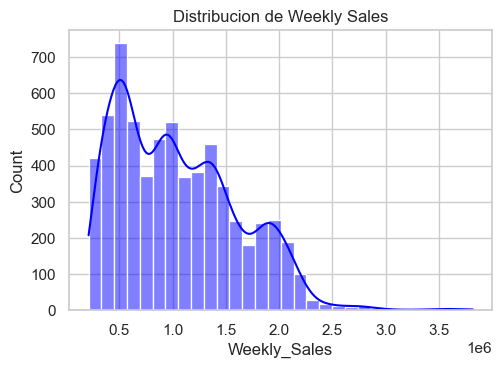

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Histograma de Weekly Sales
plt.subplot(2, 2, 1)
sns.histplot(df['Weekly_Sales'], kde=True, color='blue', bins=30)
plt.title("Distribucion de Weekly Sales")


Text(0.5, 1.0, 'Boxplot of Temperature')

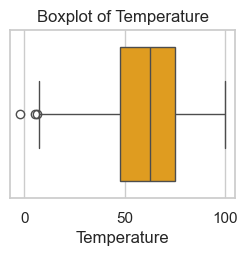

In [19]:
# Boxplot de Temperature
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Temperature'], color='orange')
plt.title("Boxplot of Temperature")

C:\Users\damav\AppData\Local\Temp\ipykernel_7116\3141775007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Holiday_Flag'], palette='Set2')


Text(0.5, 1.0, 'Holiday Presence (0 = No, 1 = Yes)')

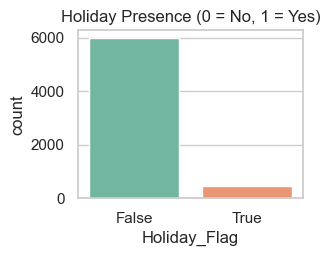

In [18]:
# Bar para Holiday
plt.subplot(2, 2, 3)
sns.countplot(x=df['Holiday_Flag'], palette='Set2')
plt.title("Holiday Presence (0 = No, 1 = Yes)")

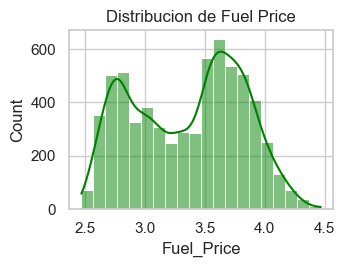

In [17]:
# Histograma para Fuel Price
plt.subplot(2, 2, 4)
sns.histplot(df['Fuel_Price'], kde=True, color='green', bins=20)
plt.title("Distribucion de Fuel Price")

plt.tight_layout()
plt.show()

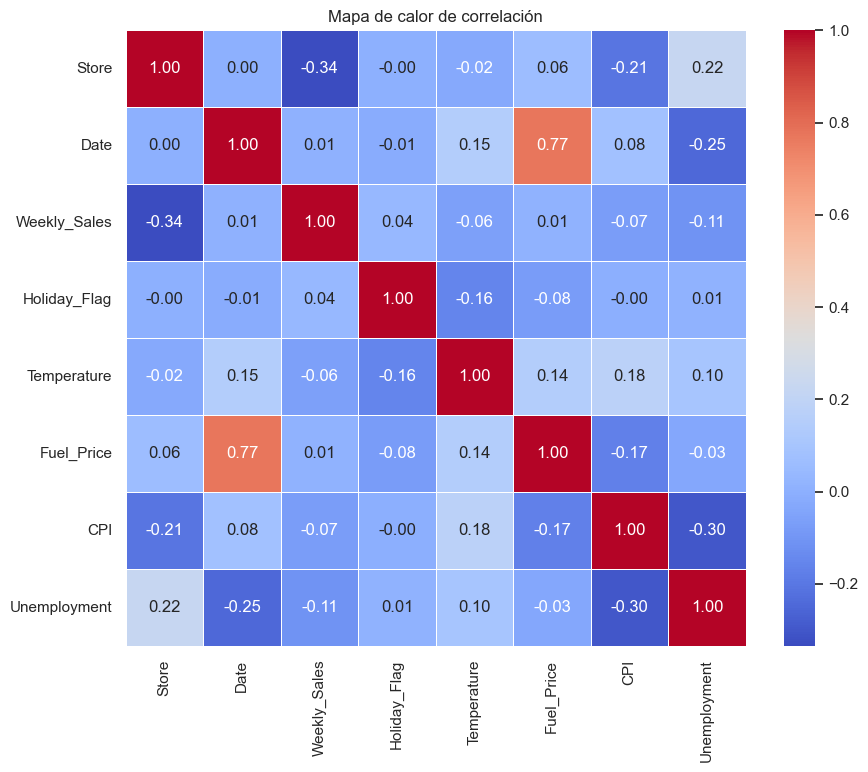

In [16]:
 #CorrelaCIO Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlación")
plt.show()